In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('mobile_dataset.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Univariate Selection

In [8]:

X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [9]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [10]:
Y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [11]:
from sklearn.feature_selection import SelectKBest

In [12]:
from sklearn.feature_selection import chi2

In [16]:
top_feature = SelectKBest(score_func=chi2, k=20)
top_feature = top_feature.fit(X, Y)

In [22]:
data_scores = pd.DataFrame(top_feature.scores_, columns=['Score'])
data_cols = pd.DataFrame(X.columns)

In [24]:
feature_rank = pd.concat([data_cols, data_scores], axis=1)

In [25]:
feature_rank

,0,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [29]:
feature_rank.columns = ['Feature', 'Score']
feature_rank.sort_values(by='Score', ascending=False)

,Feature,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


## Feature Importance

In [30]:
#This technique gives you a score for each feature of your data
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [31]:
model = ExtraTreesClassifier()
model.fit(X, Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [32]:
print(model.feature_importances_)

[0.06221596 0.02014796 0.03354795 0.01906106 0.03155302 0.01770728
 0.03408816 0.0330262  0.03538869 0.03148816 0.03347359 0.04684721
 0.04857905 0.4034553  0.0323091  0.03222647 0.03416748 0.01374747
 0.01663523 0.02033465]


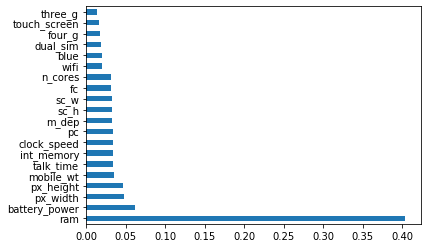

In [35]:
ranked_features = pd.Series(model.feature_importances_, index=X.columns)
ranked_features.sort_values(ascending=False).plot(kind='barh')
plt.show()

## Correlation

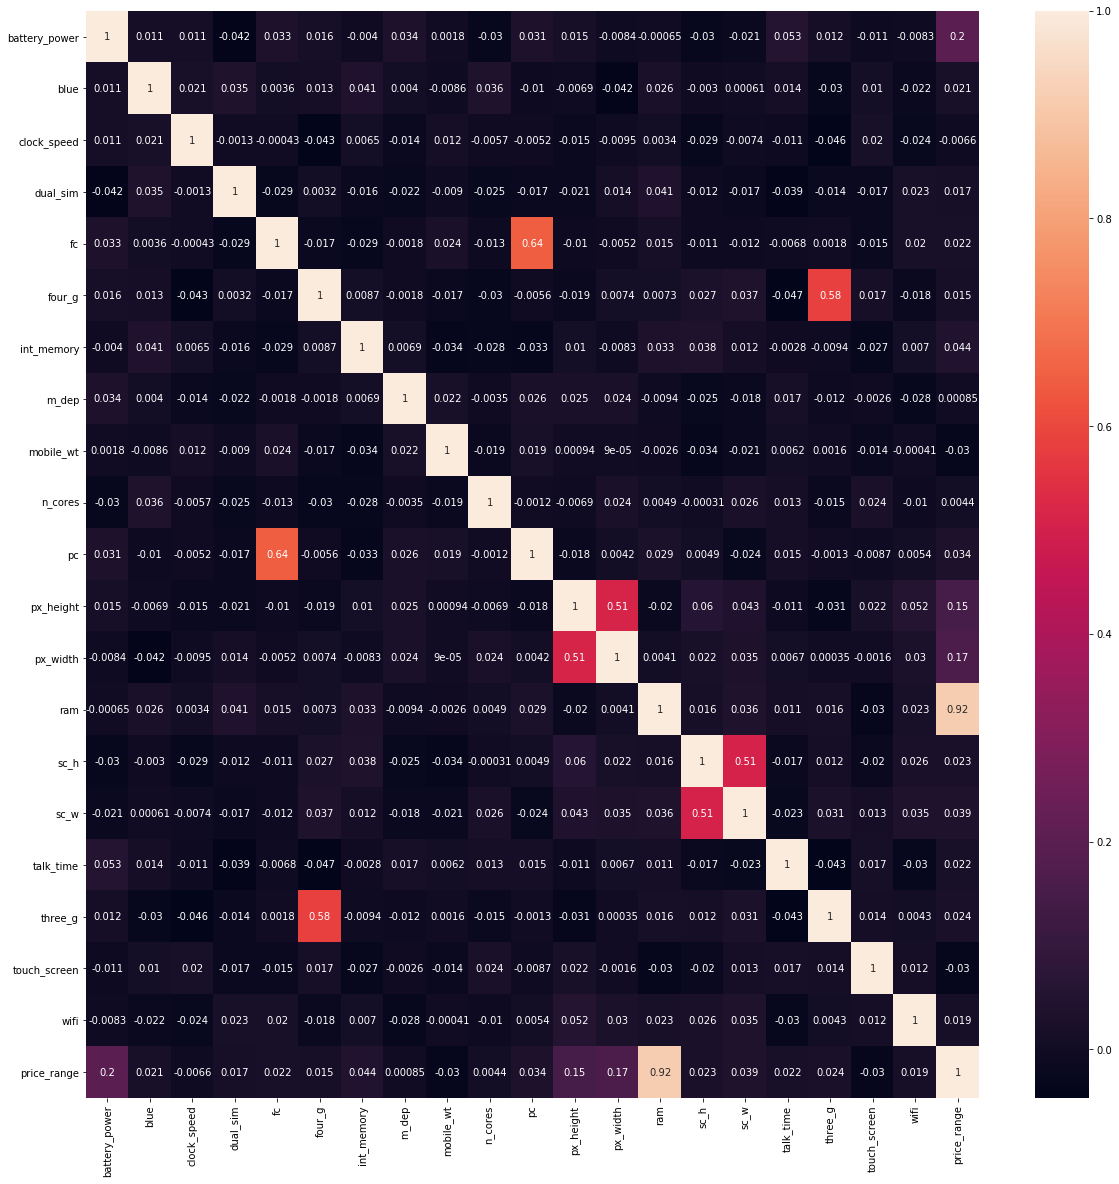

In [36]:
import seaborn as sns
corr = data.corr()
top_features = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_features].corr(), annot=True)

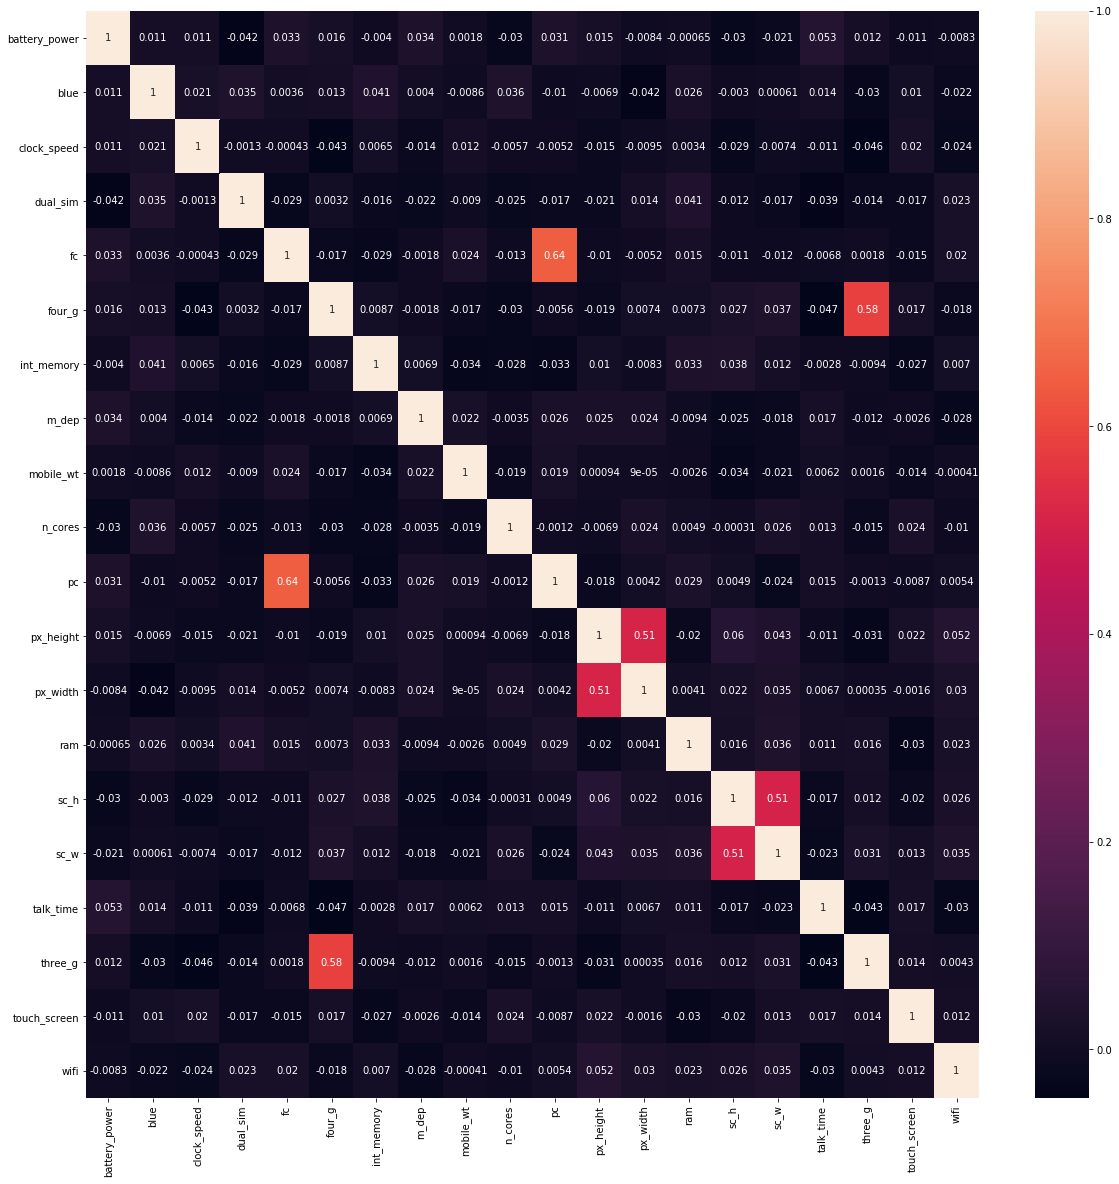

In [38]:
corr = data.iloc[:,:-1].corr()
top_features = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(data[top_features].corr(), annot=True)

### Remove The Correlated feature

In [41]:
threshold=0.5
def correlation(dataset, thershold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [42]:
correlation(data.iloc[:,:-1], threshold)

{'pc', 'px_width', 'sc_w', 'three_g'}

## Information Gain

In [43]:
from sklearn.feature_selection import mutual_info_classif

In [45]:
mutual_info = mutual_info_classif(X, Y)

In [46]:
mutual_data = pd.Series(mutual_info, index=X.columns)
mutual_data.sort_values(ascending=False)

ram              0.849898
px_width         0.031242
battery_power    0.029900
fc               0.029177
sc_h             0.028988
px_height        0.025093
mobile_wt        0.016420
n_cores          0.013778
m_dep            0.006601
wifi             0.004979
sc_w             0.000000
pc               0.000000
touch_screen     0.000000
talk_time        0.000000
int_memory       0.000000
four_g           0.000000
three_g          0.000000
dual_sim         0.000000
clock_speed      0.000000
blue             0.000000
dtype: float64